## Problem #1
### Kaggle - House Prices: Advanced Regression Techniques 

After installing the API to download data from Kaggle

In [1]:
%cd ~/.kaggle/competitions/house-prices-advanced-regression-techniques

/Users/rachit/.kaggle/competitions/house-prices-advanced-regression-techniques


In [2]:
%ls

data_description.txt      test.csv                  train.csv.gz
sample_submission.csv     test.csv.gz
sample_submission.csv.gz  train.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [228]:
train_ID = train['Id']
test_ID = test['Id']

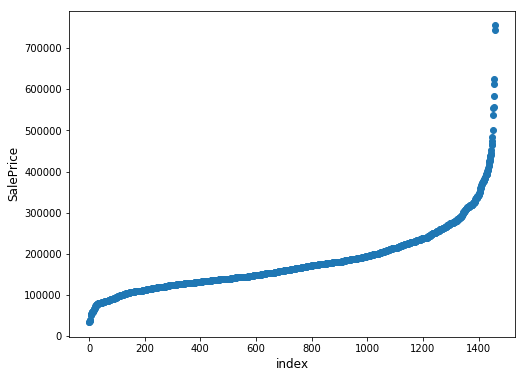

In [6]:
# plotting the dependant variable

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.SalePrice.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

### Dependant Variable Analysis

In [7]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


 mu = 180921.20 and sigma = 79415.29



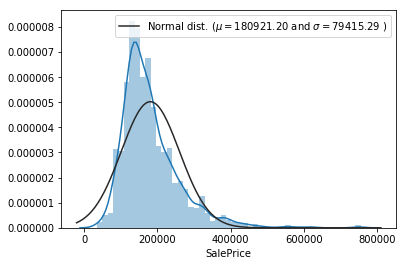

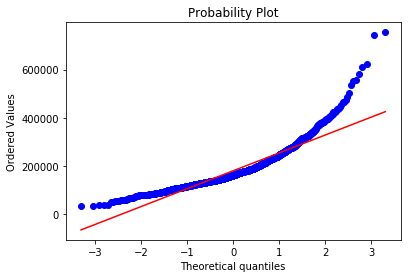

In [8]:
sns.distplot(train_df['SalePrice'], fit=norm);

(mu, sigma) = norm.fit(train_df['SalePrice'])
print ('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


# plot the distribution
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma=${:.2f} )'.format(mu,sigma)])

# also creating the Q-Q plot

fig=plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

Dependant variable has right skew, and since linear models require normoal distribution, will apply transformation in the next step

#### Log transformation of the dependant variable

In [9]:
# using numpy's log1p, which is log(1+x) on the column

train_df["ln_SalePrice"] = np.log1p(train_df["SalePrice"])

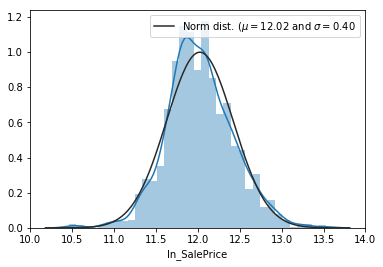

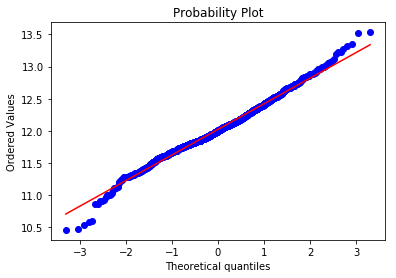

In [10]:
# checking the new distribution
(mu, sigma) = norm.fit(train_df['ln_SalePrice'])
sns.distplot(train_df['ln_SalePrice'], fit=norm)

plt.legend([('Norm dist. ($\mu=${:.2f} and $\sigma=${:.2f}').format(mu, sigma)])

fig = plt.figure()
res = stats.probplot(train_df['ln_SalePrice'], plot=plt)
plt.show()



In [165]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

y_train = train_df.ln_SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

all_data.drop(['SalePrice', 'ln_SalePrice'], axis=1, inplace=True)

In [99]:
all_data.shape, train_df.shape, test_df.shape

((2919, 76), (1460, 78), (1459, 76))

#### Fill Rate Analysis

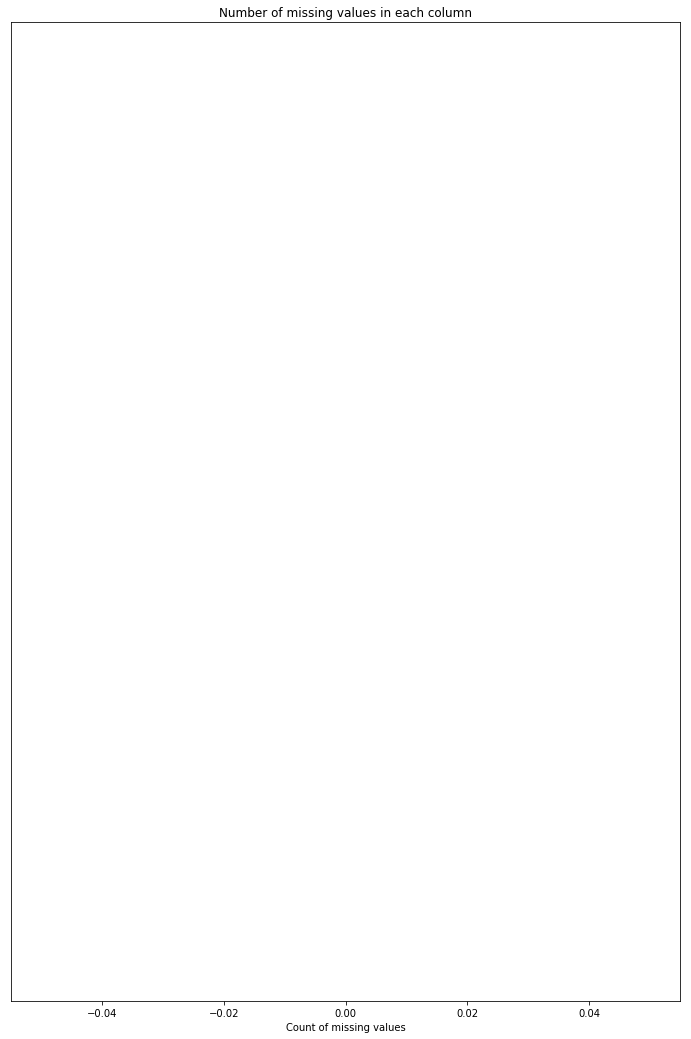

In [224]:
missing_df = all_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()


In [168]:
# Can drop the below variables since there is more than 80% missing data

missing_df = all_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / all_data.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.80]

,column_name,missing_count,missing_ratio


In [146]:
cols_to_drop = missing_df.loc[missing_df['missing_ratio']>0.80]
lst_var_to_drop = list(cols_to_drop.column_name.values)

train_df.drop(lst_var_to_drop, axis=1, inplace=True)

In [147]:
test_df.drop(lst_var_to_drop, axis=1, inplace=True)

In [181]:
dtype_df = all_data_2.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]

In [182]:
dtype_df.groupby('Column Type').count().reset_index()

,Column Type,Count
0,float64,33


In [172]:
# seperating out the categorical variables

cat_var = dtype_df[dtype_df['Column Type'] == 'object'].Count.values
cont_var = dtype_df[dtype_df['Column Type'] == 'float64'].Count.values

In [173]:
cat_var, cont_var

(array(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1',
        'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
        'Exterior2nd', 'FireplaceQu', 'Foundation', 'Functional',
        'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
        'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour',
        'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType',
        'MoSold', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
        'SaleCondition', 'SaleType', 'Street', 'Utilities', 'YearBuilt',
        'YearRemodAdd', 'YrSold'], dtype=object),
 array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
        'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
        'KitchenAbvGr', 'LotArea', 'LotFront

In [174]:
# Few of the above variables are really categorical but not continous, so transforming them into the same

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)

In [153]:
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)
train_df['YearBuilt'] = train_df['YearBuilt'].astype(str)
train_df['YearRemodAdd'] = train_df['YearRemodAdd'].astype(str)
train_df['YearRemodAdd'] = train_df['YearRemodAdd'].astype(str)

### Missing Value Imputation

In [154]:
# categorical variables: to replace with the mode for that variable

for var in cat_var:
    train_df[var].fillna(train_df[var].mode()[0], inplace=True)
    
# to further improve the model, we would have to go through at variable level and impute values accrodingly

In [190]:
all_data[cont_var] = all_data[cont_var].fillna(all_data.mean().iloc[0])

#### Skew check in numerical features

In [185]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,14.342868
3SsnPorch,7.669694
LowQualFinSF,7.374240
MiscVal,5.082645
BsmtHalfBath,3.898693
KitchenAbvGr,3.339055
ScreenPorch,3.128072
BsmtFinSF2,2.472925
EnclosedPorch,2.078729
HalfBath,0.545949


In [187]:
skewness = skewness[abs(skewness) > 0.75]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(train_df[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [82]:
for feat in skewed_features:
    #all_data[feat] += 1
    if (feat not in ['SalePrice', 'ln_SalePrice']) :
        test_df[feat] = boxcox1p(test_df[feat], lam)

In [ ]:
# In case of numerical varibles, capping the outliers to 95th-%tile.  
# Since linear regression is sensitive to outliers



In [26]:
# numerical variables: replacing with the mean value

# train_df_2['LotFrontage'].fillna((train_df_2['LotFrontage'].mean()), inplace=True)
# train_df_2['GarageYrBlt'].fillna((train_df_2['GarageYrBlt'].mean()), inplace=True)
# train_df_2['MasVnrArea'].fillna((train_df_2['MasVnrArea'].mean()), inplace=True)

In [191]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [23]:
# creating the one hot encoded variables, and dropping the original variables

def get_dummies_ohe(df, varlst):
    df_mod = df.copy()
    for var in varlst:
        new_var_name_lst = []
        new_var_lst = pd.get_dummies(df[var])
        df_mod = df_mod.drop(var, axis=1)
        for elem in new_var_lst.columns:
            new_var_name_lst.append(var+'_'+str(elem))
        new_var_lst.columns = new_var_name_lst
        df_mod = df_mod.join(new_var_lst)
    return df_mod

In [192]:
all_data_2 = get_dummies_ohe(all_data, cat_var)

In [193]:
len(all_data_2.columns)

468

### Principal Component Analysis

In [30]:
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler


In [31]:
??sklearnPCA

In [194]:
train = all_data_2[:ntrain]
test = all_data_2[ntrain:]

In [195]:
y = train_df['ln_SalePrice']
X = train

In [196]:
X = X.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(X)

In [197]:
test_std = StandardScaler().fit_transform(test)

In [198]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0006854  -0.36428694  0.0583364  ..., -0.04020635 -0.00712028
  -0.00160545]
 [-0.36428694  1.0006854  -0.02511969 ...,  0.01518838  0.00888595
  -0.02845497]
 [ 0.0583364  -0.02511969  1.0006854  ...,  0.04074688  0.00655791
  -0.01445742]
 ..., 
 [-0.04020635  0.01518838  0.04074688 ...,  1.0006854  -0.28165493
  -0.18937511]
 [-0.00712028  0.00888595  0.00655791 ..., -0.28165493  1.0006854
  -0.20268749]
 [-0.00160545 -0.02845497 -0.01445742 ..., -0.18937511 -0.20268749
   1.0006854 ]]


In [199]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [200]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  1.04635912e-01+0.j  -8.94611498e-02+0.j  -1.92510297e-01+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  1.27706324e-02+0.j   1.31637569e-01+0.j  -3.89577259e-03+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  1.28298930e-02+0.j  -1.64886052e-02+0.j  -2.42939885e-02+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 ..., 
 [ -5.92621620e-03+0.j  -9.56385103e-05+0.j   1.09029957e-02+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [ -2.23240742e-04+0.j   7.38774039e-03+0.j  -1.21591587e-03+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [ -3.03957778e-03+0.j  -2.49658041e-02+0.j   2.01460105e-02+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]]

Eigenvalues 
[  1.77496908e+01 +0.00000000e+00j   9.55535714e+00 +0.00000000e+00j
   6.79746137e+00 +0.00000000e+00j   6.45045553e+00 +0.00000000e+00j
   5.22333

In [201]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
17.7496908458
9.55535713598
6.79746136631
6.45045552539
5.22333928809
4.97788858904
4.65791548501
4.01351079418
3.85927697782
3.68777712348
3.57439104755
3.48275620354
3.41988589457
3.2962979596
3.23751154133
3.10707691625
3.07771801277
3.02665801528
3.00903510935
2.96877457556
2.89284073641
2.82767285339
2.78881014823
2.76707144654
2.71825850958
2.68706517112
2.6517490279
2.64479039471
2.58012708002
2.54196852962
2.5238698706
2.48091636936
2.46329390762
2.44449348105
2.4217953554
2.39777396955
2.39270681867
2.36615144108
2.34543879477
2.32545859199
2.31880326624
2.29855102406
2.2389977698
2.26340691915
2.2602225898
2.22631701556
2.21319334364
2.19403010899
2.16180778182
2.15683476097
2.12631799933
2.11751926694
2.10078383079
2.09734555435
2.08491410501
2.06838915479
2.06270441823
2.04282952894
2.03037691435
2.0112918621
2.0070608322
2.00348896243
1.99210844776
1.97897348414
1.97313911979
1.94724592753
1.94489771013
1.92979249241
1.91656159459
1.9024941

In [202]:
pca = sklearnPCA(n_components=7)
pca.fit_transform(X)
print pca.explained_variance_ratio_


[ 0.12238738  0.0567465   0.03715849  0.02917741  0.02605047  0.02370469
  0.01982635]


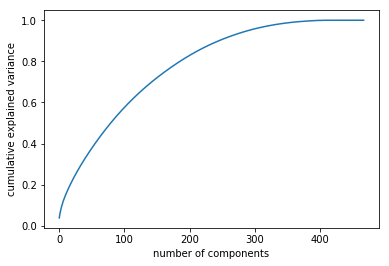

In [203]:
#Explained variance
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [204]:
eig_vecs.shape

(468, 468)

In [205]:
# planning to use top 5 components from PCA

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
matrix_w = np.hstack((eig_pairs[0][1].reshape(468,1),
                      eig_pairs[1][1].reshape(468,1),
                      eig_pairs[2][1].reshape(468,1),
                      eig_pairs[3][1].reshape(468,1),
                      eig_pairs[4][1].reshape(468,1)))

In [206]:
new_Y = X_std.dot(matrix_w)

In [207]:
new_test = test_std.dot(matrix_w)

In [208]:
X_pca_5 = pd.DataFrame(new_Y, columns=['pca1','pca2','pca3','pca4','pca5'])

In [209]:
X_pca_5.head()

,pca1,pca2,pca3,pca4,pca5
0,(4.72298989+0j),(1.51054024784+0j),(1.99853447142+0j),(-1.60773014072+0j),(1.02871825485+0j)
1,(0.0453010581917+0j),(-3.63127310146+0j),(0.598621597797+0j),(-1.02070456484+0j),(0.0603370733082+0j)
2,(5.57734828786+0j),(0.576046284469+0j),(0.715355789885+0j),(-2.82076680653+0j),(0.516728940896+0j)
3,(-1.76043822966+0j),(1.21382710146+0j),(-1.05140056796+0j),(-2.04313664074+0j),(0.676324597061+0j)
4,(6.45518968592+0j),(0.339067466928+0j),(0.0892821604584+0j),(-4.53857505395+0j),(0.269109333675+0j)


In [210]:
X_pca_5.shape

(1460, 5)

### Comparing two models
* PCA based model
* Non-PCA based, only with one hot encoded variables

In [211]:
y.shape

(1460,)

In [46]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

### Building Base Models

In [212]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_pca_5.values)
    rmse= np.sqrt(-cross_val_score(model, X_pca_5.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [213]:
# Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [214]:
# ElasticNet

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [215]:
# Kernel Ridge Regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [216]:
# xgboost

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### Models for the PCA data 

In [217]:
score = rmsle_cv(lasso)

print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0065 (0.0004)



In [218]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0065 (0.0004)



In [219]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0060 (0.0004)



In [220]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0133 (0.0007)



#### Models for the original data

In [56]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df_2.values)
    rmse= np.sqrt(-cross_val_score(model, train_df_2.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [57]:
score = rmsle_cv(lasso)

print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0006 (0.0000)



In [58]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0006 (0.0001)



In [59]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0147 (0.0014)



### Building a class to create stacked model

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [62]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
            
        return self

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        return np.mean(predictions, axis=1)

In [221]:
AveragedModel = AveragingModels(models = (ENet, model_xgb, KRR, lasso))

score = rmsle_cv(AveragedModel)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0070 (0.0004)



In [69]:
AveragedModel = AveragingModels(models = (ENet, model_xgb, KRR, lasso))

score = rmsle_cv(AveragedModel)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0200 (0.0014)



In [225]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [226]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0126548340483


In [229]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

In [230]:
%ls

data_description.txt      submission.csv            train.csv
sample_submission.csv     test.csv                  train.csv.gz
sample_submission.csv.gz  test.csv.gz


In [231]:
%pwd

u'/Users/rachit/.kaggle/competitions/house-prices-advanced-regression-techniques'